In [12]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *
import os

(119, 110, 3)
[[    0   119   238 ... 12733 12852 12971]
 [    1   120   239 ... 12734 12853 12972]
 [    2   121   240 ... 12735 12854 12973]
 ...
 [  116   235   354 ... 12849 12968 13087]
 [  117   236   355 ... 12850 12969 13088]
 [  118   237   356 ... 12851 12970 13089]]


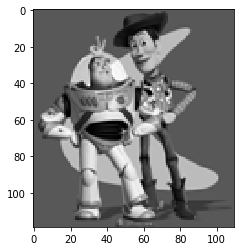

In [3]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2RGB)
toy_img = toy_img.astype(np.float32)/255.0
plt.imshow(toy_img)

print(toy_img.shape)
im_h, im_w, channel = toy_img.shape
im2var = np.arange(im_h * im_w).reshape(im_w, im_h).T
print(im2var)

## Part 1 Toy Problem (20 pts)

In [22]:
from scipy.sparse import *
from scipy.sparse.linalg import lsqr

In [23]:
a = np.zeros(2)
b = np.append(a,[2])
row = np.array([0,1,2])
col = np.array([0,1,2])
data = np.array([1,2,3])
csc_matrix( (data,(row,col)), shape=(3,3) ).todense()

matrix([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]], dtype=int64)

In [24]:
c = np.array([])

In [25]:
def toy_reconstruct(toy_img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize ((v(x+1,y)-v(x,y)) - (s(x+1,y)-s(x,y)))^2
    2. minimize ((v(x,y+1)-v(x,y)) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2

    :param toy_img: numpy.ndarray
    """
    
    im_h, im_w = toy_img.shape[0], toy_img.shape[1]
    im2var = np.arange(im_h * im_w).reshape(im_w, im_h).T
    # the size of A is (m+1)*n 
    # the size of v is n*1
    # the size of b is (m+1)*1
    m = (im_w-1)*im_h + (im_h-1)*im_w + 1
    n = im_w * im_h
#     A = np.zeros((m,n), dtype = np.float32)
    v = np.zeros((toy_img.shape[0], toy_img.shape[1], toy_img.shape[2]), dtype=np.float32)
   
    for i in range(toy_img.shape[2]):
        e = 0 # the number of equations 
        b = np.zeros(m, dtype = np.float32)
        A_row = np.array([])
        A_col = np.array([])
        A_data = np.array([])
        # objective 1: minimize ((v(x+1,y)-v(x,y)) - (s(x+1,y)-s(x,y)))^2
        for x in range(0,im_w-1):
            for y in range(0,im_h):
                A_row = np.append(A_row,[e])
                A_col = np.append(A_col,[im2var[y][x+1]])
                A_data = np.append(A_data,1)
                A_row = np.append(A_row,[e])
                A_col = np.append(A_col,[im2var[y][x]])
                A_data = np.append(A_data,-1)
#             A[e][im2var[y][x+1]] = 1
#             A[e][im2var[y][x]] = -1   
                b[e] = toy_img[y][x+1][i] - toy_img[y][x][i]
                e = e + 1
        # objective 2: minimize ((v(x,y+1)-v(x,y)) - (s(x,y+1)-s(x,y)))^2 vertical
        for x in range(0,im_w):
            for y in range(0,im_h-1):
                A_row = np.append(A_row,[e])
                A_col = np.append(A_col,[im2var[y+1][x]])
                A_data = np.append(A_data,1)
                A_row = np.append(A_row,[e])
                A_col = np.append(A_col,[im2var[y][x]])
                A_data = np.append(A_data,-1)
#             A[e][im2var[y+1][x]] = 1
#             A[e][im2var[y][x]] = -1
                b[e] = toy_img[y+1][x][i] - toy_img[y][x][i]
                e = e + 1
        # objective 3: minimize (v(1,1)-s(1,1))^2
        A_row = np.append(A_row,[e])
        A_col = np.append(A_col,[im2var[0][0]])
        A_data = np.append(A_data,1)
    #     A[e][im2var[0][0]] = 1
        b[e] = toy_img[0][0][i]

        A_sparse = csr_matrix((A_data,(A_row,A_col)), shape=(m,n), dtype =np.float32).todense()
#         if convert from the coo_matrix, use the following line
#         A_sparse = csr_matrix(lil_matrix(A))

        v[:,:,i] = lsqr(A_sparse, b)[0].reshape(im_w, im_h).T
    
    return np.abs(v)

In [26]:
im_out = toy_reconstruct(toy_img)
if im_out.any():
    print("Error is: ", np.sqrt(((im_out - toy_img)**2).sum()))

Error is:  0.0005535067


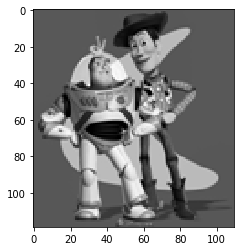

In [27]:
plt.imshow(im_out)

## Preparation

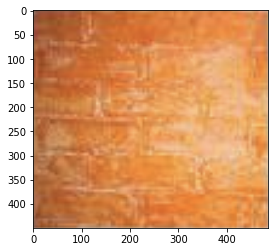

In [50]:
# Feel free to change image
background_img = cv2.cvtColor(cv2.imread('image/back2.jpeg'), cv2.COLOR_BGR2RGB).astype('double')[::2,::2,:] / 255.0 
plt.figure()
plt.imshow(background_img)

If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


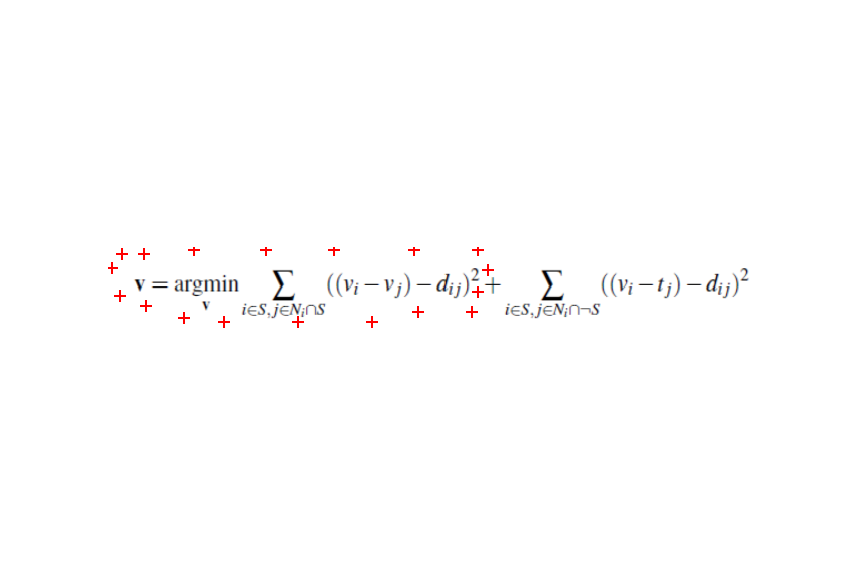

In [54]:
# Feel free to change image
object_img = cv2.cvtColor(cv2.imread('image/fore2.jpeg'), cv2.COLOR_BGR2RGB).astype('double')[::2,::2,:] / 255.0 
import matplotlib.pyplot as plt
%matplotlib notebook
mask_coords = specify_mask(object_img)

<Figure size 432x288 with 0 Axes>

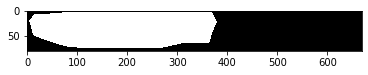

In [55]:
xs = mask_coords[0]
ys = mask_coords[1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
mask = get_mask(ys, xs, object_img)

If it doesn't get you to the drawing mode, then rerun this function again. Also, make sure the object fill fit into the background image. Otherwise it will crash


<IPython.core.display.Javascript object>


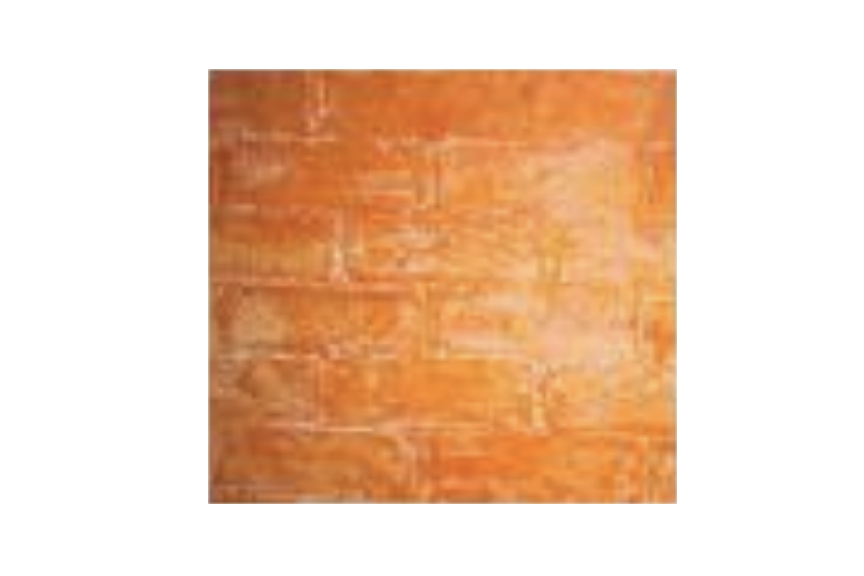

In [60]:
%matplotlib notebook
import matplotlib.pyplot as plt
bottom_center = specify_bottom_center(background_img)

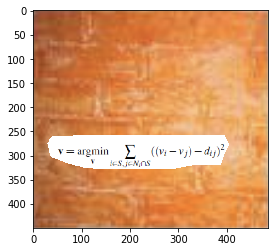

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
cropped_object, object_mask = align_source(object_img, mask, background_img, bottom_center)

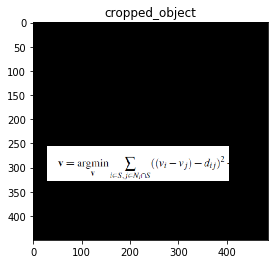

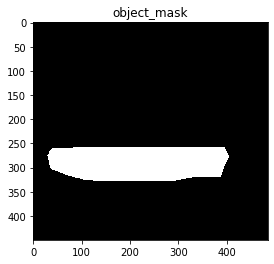

In [62]:
plt.imshow(cropped_object)
plt.title('cropped_object')
plt.show()
plt.imshow(object_mask, cmap = 'gray')
plt.title('object_mask')
plt.show()

In [63]:
row, column = np.where(object_mask==True)
print(col.size)
print(col)
print(row.size)
print(row)

3
[0 1 2]
24044
[257 257 257 ... 328 328 328]


In [64]:
min_col = np.min(col)
min_col_arr = np.where(col==np.min(col))[0]
# print(min_col_arr.size)
# min_col_arr_2 = np.where(col==np.min(col)+2)[0]
# print(min_col_arr_2.size)

min_col_sample = min_col_arr[0]
print(min_col_sample)


0


In [65]:
np.where(col == min_col)[0]

array([0])

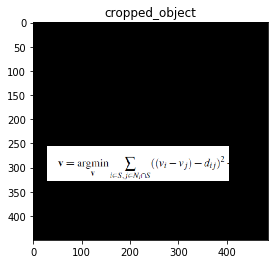

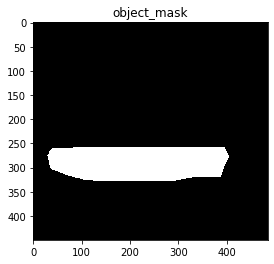

In [66]:
plt.imshow(cropped_object)
plt.title('cropped_object')
plt.show()
plt.imshow(object_mask, cmap = 'gray')
plt.title('object_mask')
plt.show()

## Part 2 Poisson Blending (50 pts)

In [43]:
def poisson_blend(cropped_object, object_mask, background_img):
    
    row, col = np.where(object_mask==1)
    # where the foreground pixel starts 
    min_row = min(row)-1
    max_row = max(row)+1
    min_col = min(col)-1
    max_col = max(col)+1
    print(min_row)
    print(max_row)
    print(min_col)
    print(max_col)
    plt.imshow(object_mask[min_row-1:max_row+1, min_col-1:max_col+1], cmap = 'gray')
    plt.show()
    
    im_h = max_row - min_row + 1 # 209
    im_w = max_col - min_col + 1 # 150
    print(im_h,im_w)
    pixels = im_h * im_w
    im2var = np.arange(im_h * im_w).reshape(im_w, im_h).T
    # the size of A is (4*pixels)*pixels
    # the size of v is pixels*1
    # the size of b is (4*pixels)*1
    v = np.zeros((im_h,im_w,3), dtype=np.float32)
    for i in range(toy_img.shape[2]):
        # for 3 channels
        e = 0
        b = np.zeros(4*pixels, dtype=np.float32)
        A_row = np.array([])
        A_col = np.array([])
        A_data = np.array([])
        for x in range(min_col , max_col+1):
            for y in range(min_row , max_row+1):
#                 print(x,y)
                if object_mask[y,x] == 0:
                    # append 4-zero equations
                    continue
#                     b[e],b[e+1],b[e+2],b[e+3] = 0,0,0,0
#                     e = e + 4
                else:
                    # construct 4 equations for that pixel
                    x = x - min_col
                    y = y - min_row
                    # for left pixel
                    # A[e][im2var[y][x]] = 1
                    if not((mask[x-1,y] == 0) and (x-1 <= 0)):
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y][x]])
                        A_data = np.append(A_data,1) 
                        # A[e][im2var[y][x-1]] = -1 
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y][x-1]])
                        A_data = np.append(A_data,-1)
                        if mask[x-1,y] != 0:
                            b[e] = cropped_object[y][x][i] - cropped_object[y][x-1][i]         
                        else:
                            b[e] = cropped_object[y][x][i] - background_img[y][x-1][i]   
                        e = e + 1
                    
                    # for right pixel
                    # A[e][im2var[y][x+1]] = 1
                    if not(x+1 >= im_w):
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y][x+1]])
                        A_data = np.append(A_data,1) 
                        # A[e][im2var[y][x]] = -1 
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y][x]])
                        A_data = np.append(A_data,-1)
                        if mask[x+1,y] != 0:
                            b[e] = cropped_object[y][x+1][i] - cropped_object[y][x][i]         
                        else: 
                            b[e] = background_img[y][x+1][i] - cropped_object[y][x][i]   
                        e = e + 1
                        
                    # for up pixel
                    # A[e][im2var[y+1][x]] = 1
                    if not((mask[x,y+1] == 0) and (y+1 >= im_h)):
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y+1][x]])
                        A_data = np.append(A_data,1) 
                        # A[e][im2var[y][x]] = -1 
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y][x]])
                        A_data = np.append(A_data,-1)
                        if mask[x,y+1] != 0:
                            b[e] = cropped_object[y+1][x][i] - cropped_object[y][x][i]         
                        else:
                            b[e] = background_img[y+1][x][i] - cropped_object[y][x][i]   
                        e = e + 1
                    
                    # for bottom pixel
                    # A[e][im2var[y][x]] = 1
                    if not((mask[x,y-1] == 0) and (y-1 <= 0)):
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y][x]])
                        A_data = np.append(A_data,1) 
                        # A[e][im2var[y-1][x]] = -1 
                        A_row = np.append(A_row,[e])
                        A_col = np.append(A_col,[im2var[y-1][x]])
                        A_data = np.append(A_data,-1)
                        if mask[x,y-1] != 0:
                            b[e] = cropped_object[y][x][i] - cropped_object[y-1][x][i]         
                        else:
                            b[e] = cropped_object[y][x][i] - background_img[y-1][x][i]   
                        e = e + 1
                    
        A_sparse = csr_matrix((A_data,(A_row,A_col)), shape=(4*pixels,pixels), dtype =np.float32).todense()
        v[:,:,i] = lsqr(A_sparse, b)[0].reshape(im_w, im_h).T
    v_extend = np.array(background_img.shape)
    v_extend[min_row:max_row+1, min_col:max_col+1,:] = v
    result = background_img*(1-object_mask) + v_extend * object_mask
    return result
                


In [45]:
im_blend = poisson_blend(cropped_object, object_mask, background_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


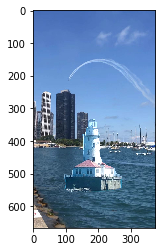

In [47]:
if im_blend.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure()
    plt.imshow(np.abs(im_blend))

## Part 3 Mixed Gradients (20 pts)

In [67]:
def mix_blend(cropped_object, object_mask, background_img):
    """
    :param cropped_object: numpy.ndarray One you get from align_source
    :param object_mask: numpy.ndarray One you get from align_source
    :param background_img: numpy.ndarray 
    """
    #TO DO 
    col, row = np.where(object_mask==True)
    min_col_arr = np.where(col==np.min(col))[0]
    min_col_sample = min_col_arr[0]
    max_col_arr = np.where(col==np.max(col))[0]
    max_col_sample = max_col_arr[0]
    min_row_arr = np.where(row==np.min(row))[0]
    min_row_sample = min_row_arr[0]
    max_row_arr = np.where(row==np.max(row))[0]
    max_row_sample = max_row_arr[0]
    
    # for the pixels in the mask region, do toy_reconstruct
    v = background_img[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,:]*0
    out = cropped_object[:,:,:]
    for i in range(background_img.shape[2]):
        im = cropped_object[col[min_col_sample] : col[max_col_sample]+1, row[min_row_sample] : row[max_row_sample] + 1, i]
        S = background_img[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,i]
        im_h, im_w = im.shape
        im2var = np.arange(im_h*im_w).reshape(im_w, im_h).T
        count = 0
        A = np.zeros((im_h*(im_w-1) + (im_h-1)*im_w + 4, im_h*im_w))
        b = np.zeros(A.shape[0])
        e = 0
        for y in range(im_h):
            for x in range(im_w-1):
                A[e][im2var[y][x+1]] = 1
                A[e][im2var[y][x]] = -1
                b[e] = compare(im[y][x+1] - im[y][x], S[y][x+1] - S[y][x])
                e += 1
        for y in range(im_h-1):
            for x in range(im_w):
                A[e][im2var[y+1][x]] = 1
                A[e][im2var[y][x]] = -1
                b[e] = compare(im[y+1][x] - im[y][x], S[y+1][x] - S[y][x])
                e += 1
        A[e][im2var[0][row[min_col_sample]-row[min_row_sample]]] = 1 
        b[e] = S[0][row[min_col_sample]-row[min_row_sample]] 
        e+=1
        A[e][im2var[-1][row[max_col_sample]-row[min_row_sample]]] = 1 
        b[e] = S[-1][row[max_col_sample]-row[min_row_sample]] 
        e+=1
        A[e][im2var[col[min_row_sample]-col[min_col_sample]][0]] = 1 
        b[e] = S[col[min_row_sample]-col[min_col_sample]][0] 
        e+=1
        A[e][im2var[col[max_row_sample]-col[min_col_sample]][-1]] = 1 
        b[e] = S[col[max_row_sample]-col[min_col_sample]][-1] 
        e+=1
        A_sparse = csr_matrix(lil_matrix(A))
        v[:,:,i] = scipy.sparse.linalg.lsqr(A_sparse, b)[0].reshape(im_w, im_h).T
    out[col[min_col_sample]:col[max_col_sample]+1,row[min_row_sample]:row[max_row_sample]+1,:] = v
    return  np.abs(out*np.stack((object_mask, object_mask, object_mask),axis=2)+background_img*(1-np.stack((object_mask, object_mask, object_mask),axis=2)))

def compare(a, b):
    if abs(a) > abs(b):
        return a
    else:
        return b

In [68]:
im_mix = mix_blend(cropped_object, object_mask, background_img)

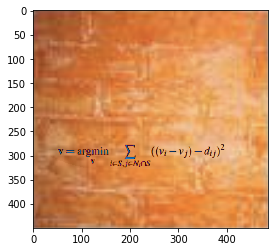

In [69]:
if im_mix.any():
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.imshow(im_mix)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [13]:
from scipy.sparse import *
import scipy

In [14]:
def color2gray(img):
    v = np.zeros((img.shape[0], img.shape[1]))
    im = img[:,:,:]
    im_h, im_w, im_d = im.shape
    im2var = np.arange(im_h*im_w).reshape(im_w, im_h).T
    count = 0
    A = np.zeros((im_h*(im_w-1) + (im_h-1)*im_w + min(im_h, im_w), im_h*im_w))
    b = np.zeros(A.shape[0])
    e = 0
    for y in range(im_h):
        for x in range(im_w-1):
            A[e][im2var[y][x+1]] = 1
            A[e][im2var[y][x]] = -1
            b[e] = compare_three(im[y][x+1][0] - im[y][x][0], im[y][x+1][1] - im[y][x][1], im[y][x+1][2] - im[y][x][2])
            e += 1
    for y in range(im_h-1):
        for x in range(im_w):
            A[e][im2var[y+1][x]] = 1
            A[e][im2var[y][x]] = -1
            b[e] = compare_three(im[y+1][x][0] - im[y][x][0], im[y+1][x][1] - im[y][x][1], im[y+1][x][2] - im[y][x][2])
            e += 1
    for i in range(0, min(im_h, im_w), 2):
        A[e][im2var[i][i]] = 1 
        b[e] = compare_three(im[i][i][0], im[i][i][1], im[i][i][2])
        e += 1
    A_sparse = csr_matrix(lil_matrix(A))
    
    v[:,:] = scipy.sparse.linalg.lsqr(A_sparse, b)[0].reshape(im_w, im_h).T
    return v
    pass

def compare_three(a, b, c):
    d = {}
    d[abs(a)] = a
    d[abs(b)] = b
    d[abs(c)] = c
    return d[max(abs(a), abs(b), abs(c))]

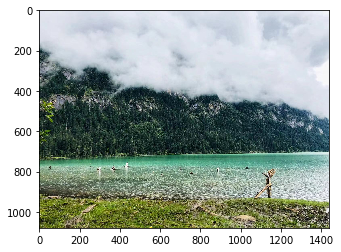

In [16]:
cb4_img = cv2.cvtColor(cv2.imread('image/sample.jpeg'), cv2.COLOR_BGR2RGB)/255.0
plt.imshow(cb4_img)

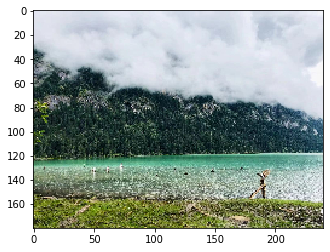

In [17]:
cb4_img = cb4_img[::6,::6,:]
plt.imshow(cb4_img)

In [18]:
color2gray_out = color2gray(cb4_img)

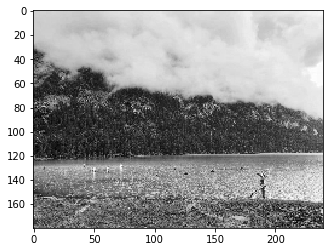

In [19]:
plt.imshow(color2gray_out, cmap='gray')

<function matplotlib.pyplot.show(*args, **kw)>

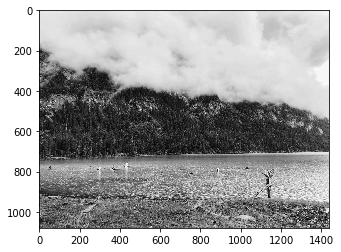

In [21]:
cb4_img = cv2.cvtColor(cv2.imread('image/sample.jpeg'), cv2.COLOR_BGR2GRAY)/255.0
plt.imshow(cb4_img,cmap = 'gray')
plt.show